# Shaply : Geometric Objects - Spatial Data Model

##### Shaply documentation: https://shapely.readthedocs.io/en/latest/

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

## 1. Point

In [2]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

point3D = Point(9.26, -2.456, 0.57)

# What is the type of the point?
point_type = type(point1)

print(point1)
print(point3D)
print(type(point1))
print(type(point3D))

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>


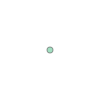

In [3]:
point1

In [4]:
# Get the coordinates
point_coords = point1.coords

# What is the type of this?
print(type(point_coords))
print(point_coords)

<class 'shapely.coords.CoordinateSequence'>


In [5]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

print(xy)
print(x)
print(y)

(array('d', [2.2]), array('d', [4.2]))
2.2
4.2


In [6]:
print("Test {} {} {}".format(point1.x, point1.y, point1.xy))

Test 2.2 4.2 (array('d', [2.2]), array('d', [4.2]))


In [7]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


## 2. LineString

In [8]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

print(line)
print(line2)
print(type(line))
print(type(line2))

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
<class 'shapely.geometry.linestring.LineString'>
<class 'shapely.geometry.linestring.LineString'>


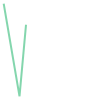

In [9]:
line

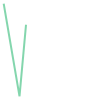

In [10]:
display(line2)

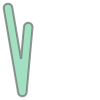

In [11]:
line.buffer(distance=1.5)

In [12]:
# Get x and y coordinates of the line
lxy = line.xy

print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [13]:
# Extract x coordinates
line_x = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_y = line.xy[1]

print(line_x)
print(line_y)

array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


In [14]:
# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

# What type is the centroid?
centroid_type = type(l_centroid)

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", centroid_type)

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


## 3. Polygon

In [15]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

# Let's see how our Polygon looks like
print(poly)
print(poly2)
print("Geometry type as text:", poly_type)
print("Geometry how Python shows it:", poly_type2)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text: Polygon
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


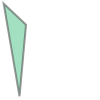

In [16]:
poly

In [17]:
?Polygon

In [18]:
# Let's create a bounding box of the world and make a whole in it
# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

print(world)
print(world_has_a_hole)
display(type(world_has_a_hole))

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


shapely.geometry.polygon.Polygon

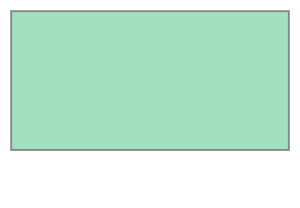

In [19]:
world

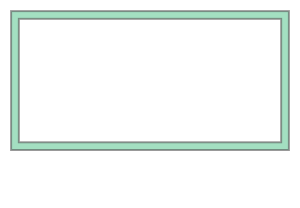

In [20]:
world_has_a_hole

In [21]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


In [22]:
world.geom_type

'Polygon'

## 4. Geometry collections

In [23]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

In some occassions it is useful to store e.g. multiple lines or polygons under a single feature</p>
i.e. a single row in a Shapefile represents more than one line or polygon object. 

* Collections of points are implemented by using a <b>MultiPoint</b> object 
* Collections of curves by using a <b>MultiLineString</b> object
* Collections of surfaces by a <b>MultiPolygon</b> object

### 4a. MultiPoint

In [24]:
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

print("MultiPoint:", multi_point)
print("MultiPoint2:", multi_point2)

MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiPoint2: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


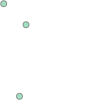

In [25]:
multi_point

In [26]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull

print("Convex hull of the points: ", convex)

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))


### 4b. MultiLineString

In [27]:
# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])

line2 = LineString([point2, point3])

multi_line = MultiLineString([line1, line2])
    
print("MultiLine: ", multi_line)

MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


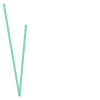

In [28]:
multi_line

In [29]:
# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)
    
print("Number of lines in MultiLineString:", lines_count)

Number of lines in MultiLineString: 2


### 4c. MultiPolygon

In [30]:
# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)


print("Bounding box: ", west_poly)

Bounding box:  POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80))


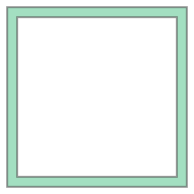

In [31]:
west_poly

In [32]:
# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90

max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

print("Bounding box: ", east_poly_box)

Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


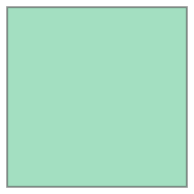

In [33]:
east_poly_box

In [34]:
# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

print("MultiPoly: ", multi_poly)

MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


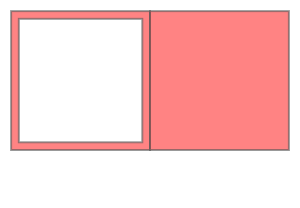

In [35]:
multi_poly

In [36]:
# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

print("Area of our MultiPolygon:", multi_poly_area)

Area of our MultiPolygon: 39200.0


In [37]:
# We can also access different items inside our geometry collections. We can e.g. access a single polygon from
# our MultiPolygon -object by referring to the index
# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area

print("Area of our Western Hemisphere polygon:", west_area)

Area of our Western Hemisphere polygon: 6800.0


In [38]:
# We can check if we have a "valid" MultiPolygon. MultiPolygon is thought as valid if the individual polygons
# does notintersect with each other. Here, because the polygons have a common 0-meridian, we should NOT have
# a valid polygon. This can be really useful information when trying to find topological errors from your data
valid = multi_poly.is_valid

print("Is polygon valid?: ", valid)

Is polygon valid?:  False
